## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Loading the CSV file

In [2]:
df=pd.read_csv(r"Multiple CSV\6.overlap.csv",header=None) 
df.head() 

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [3]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

2
0    50
1    50
Name: count, dtype: int64

<Axes: ylabel='0'>

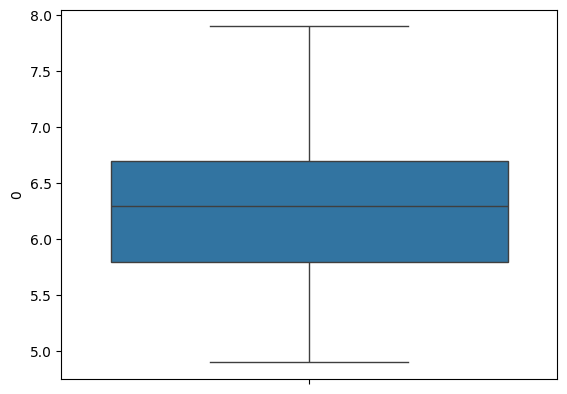

In [5]:
## Identifying outliers 
sns.boxplot(df[0])  

<Axes: ylabel='1'>

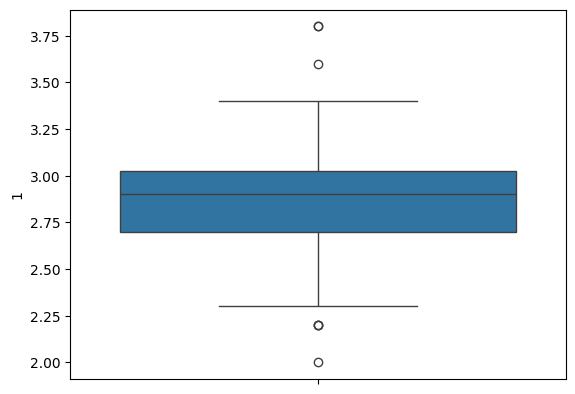

In [6]:
sns.boxplot(df[1]) 

In [7]:
# removing the outliers
df=df[(df[1]<3.50)&(df[1]>2.25)]  

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       93 non-null     float64
 1   1       93 non-null     float64
 2   2       93 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


<Axes: ylabel='1'>

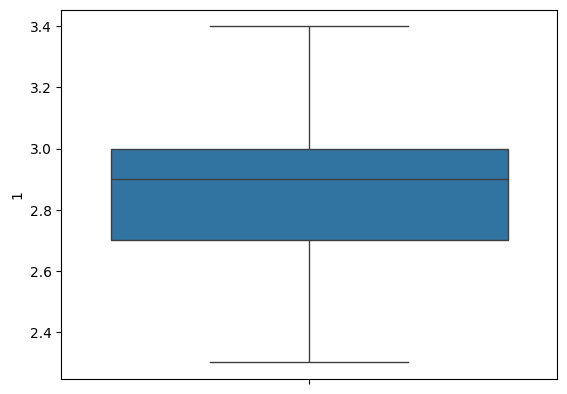

In [9]:
sns.boxplot(df[1])  

**Observation:**
- identified outliers and removed the outliers by using condition and after removing outliers, each column contains 93 data points.

## Identifying the Input and Output Features

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]  

## Spliting the data into train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardizing input features 

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Building the Logical Structure 

In [13]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [79]:
model=Sequential()
model.add(Dense(12,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(BatchNormalization())
model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid")) 

**Observation:**
- As the data is much complex, relu activation function is used.
- As model is overfitting, Regularization is used as Lasso with 0.01 learning rate.
- Even though regularization is used still model is overfitting so batch normalization is used.
- As target variable contains binary class, In output layer i have used sigmoid as activation function.

In [80]:
model.summary() 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                36        
                                                                 
 dense_33 (Dense)            (None, 10)                130       
                                                                 
 batch_normalization_13 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_34 (Dense)            (None, 8)                 88        
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 283 (1.11 KB)
Non-trainable params: 20 (80.00 Byte)
______________________

## compiling the model

In [81]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=25,validation_split=0.1) 

Epoch 1/25
5/5 [==============================] - 1s 56ms/step - loss: 1.1833 - accuracy: 0.4189 - val_loss: 0.9283 - val_accuracy: 0.6667
Epoch 2/25
5/5 [==============================] - 0s 14ms/step - loss: 1.1130 - accuracy: 0.4730 - val_loss: 0.9219 - val_accuracy: 0.6667
Epoch 3/25
5/5 [==============================] - 0s 13ms/step - loss: 1.0564 - accuracy: 0.4865 - val_loss: 0.9161 - val_accuracy: 0.5556
Epoch 4/25
5/5 [==============================] - 0s 13ms/step - loss: 1.0203 - accuracy: 0.4459 - val_loss: 0.9104 - val_accuracy: 0.5556
Epoch 5/25
5/5 [==============================] - 0s 15ms/step - loss: 0.9745 - accuracy: 0.5000 - val_loss: 0.9064 - val_accuracy: 0.5556
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 0.9474 - accuracy: 0.5270 - val_loss: 0.9026 - val_accuracy: 0.5556
Epoch 7/25
5/5 [==============================] - 0s 12ms/step - loss: 0.9144 - accuracy: 0.5270 - val_loss: 0.8990 - val_accuracy: 0.5556
Epoch 8/25
5/5 [===========

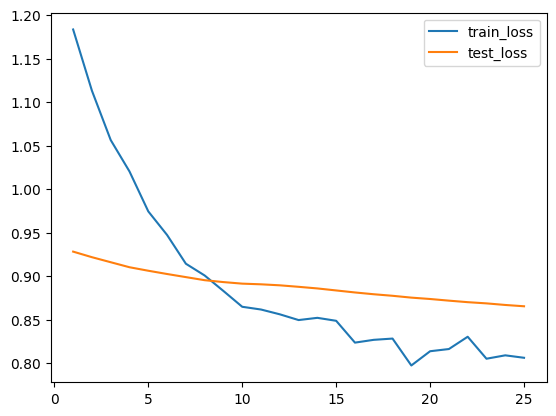

In [82]:
plt.plot(range(1,26),history.history["loss"],label="train_loss")
plt.plot(range(1,26),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model 

In [83]:
predicted=model.predict(x_test) 
predicted  

1/1 [==============================] - 0s 79ms/step


array([[0.4806536 ],
       [0.48419282],
       [0.48147634],
       [0.4886672 ],
       [0.535774  ],
       [0.60444635],
       [0.49150488],
       [0.570389  ],
       [0.5295907 ],
       [0.5295907 ]], dtype=float32)

In [84]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]])

## Evaluating the model

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
 

0.8


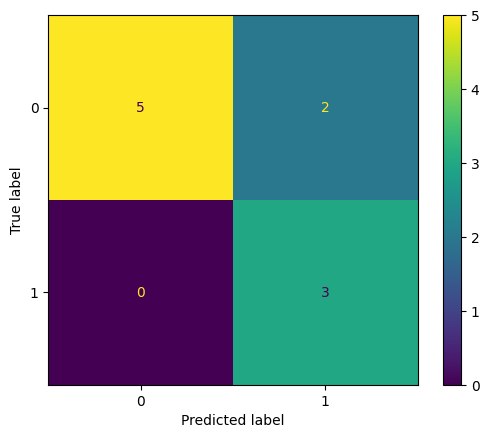

In [86]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

## PLOTING THE DECISION SURFACE

In [87]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

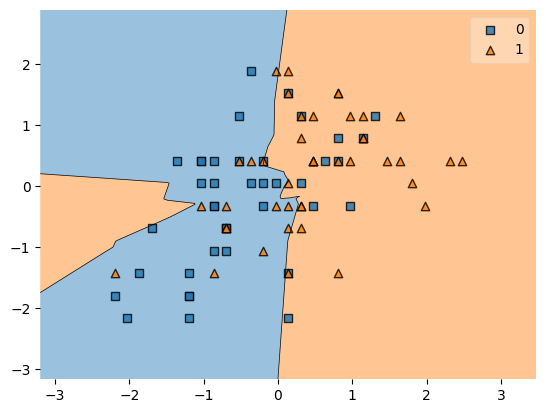

In [88]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

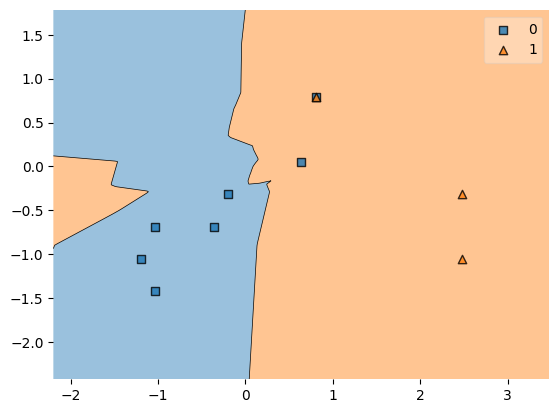

In [89]:
plot_decision_regions(x_test,y_test.values,clf=model)

## Conclusions:

###### This neural network model achieves an accuracy of 80%. 

- The model architecture consists of 3 hidden layers with the following specifications:

- In the first hidden layer, there are 12 neurons with the relu activation function
- In the second hidden layer, there are 10 neurons with the relu activation function
- In the third hidden layer, there are 8 neurons with the relu activation function 

###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 15 and a learning rate of 0.01.
- The model was trained for 25 epochs.
 
###### Overall, this neural network model architecture and training configuration achieve an accuracy of 80%.   